In [1]:
parameter_file = '../parameters/params.yaml'
import yaml
import sys
import glob
import numpy as np
import os
import pandas as pd
from os.path import join
import seaborn as sns

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation_f=doc['annotation']
results = doc["results"]

os.chdir(results)
%load_ext autoreload
%autoreload 2

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  if sys.path[0] == '':


In [2]:
homer_path =  "/data2/resources/software/homer/v4.11_10242019/bin/"
os.environ['PATH'] = f"{homer_path}:{os.environ['PATH']}"
!which homer

/data2/resources/software/homer/v4.11_10242019/bin//homer


## Input

In [3]:
main_dir = "csRNA_pipeline/"


In [4]:
csRNA_dir = join(main_dir, 'csRNA_peaks')
tissues_csRNA_dir = join(main_dir,"csRNA_peaks_tissues")
merged_csRNA_dir =  join(main_dir,"csRNA_peaks_tissues.merged")

# if not os.path.exists(tissues_csRNA_dir):
#     os.mkdir(tissues_csRNA_dir)
    
# if not os.path.exists(merged_csRNA_dir):
#     os.mkdir(merged_csRNA_dir)

In [5]:
tss_file = join("genome", "picr", "gcf", "start_site_mRNA.tsv")
cds_f = join("genome", "picr", "gcf", "CDS.bed")

In [6]:
merged_file = join(merged_csRNA_dir, 'csRNA_peaks.tissues.merge')
peak_folder = tissues_csRNA_dir


In [7]:
anno_f = merged_file+".anno"
peaks_with_distance_f = join(merged_csRNA_dir,'peaks_with_tss_distances.tsv')
peaks_expression_f = merged_file + '.peaksexpression'

peaks_with_distance_size1_f = peaks_with_distance_f.replace('.tsv',"")+ "_size1.tsv"
peaks_with_distance_size1_bed_f = peaks_with_distance_size1_f.replace('.tsv',".bed")
peaks_with_distance_size1_noCDS_bed_f =peaks_with_distance_size1_bed_f.replace('.bed',"noCDS.bed")
# out_dir = join(main_dir, "peak_files")
# if not os.path.exists(out_dir):
#     os.mkdir(out_dir)



In [8]:
from tss.data import annotation
#import annotation
#from Homer import *
print('Number of tissues: ',len(tissues))

params {'EMAIL': 'isshamie@ucsd.edu', 'parameters': 'parameters/params.yaml'}
/data2/resources/software/homer/v4.11_10242019/bin//
Number of tissues:  13


### Convert to peak expression

In [9]:
peaks_expression = annotation.convert_merged_vals_to_expression_matrix(merged_file, peak_folder=".", output_file=peaks_expression_f, orig_col="Stat", is_orig_merged=True)
peaks_expression

Number of duplicate indices (having same index name, happens bc both +/- strand on exact same bp):  0.0
./csRNA_pipeline/csRNA_peaks_tissues/FemaleReproductive.tss.txt.merge


/data/isshamie/TSS/TSS/tss/data/annotation.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt[col] = filt[col].apply(lambda x: str(int(float(x))) if ',' not in str(x) else x) #astype(int).astype(str)


./csRNA_pipeline/csRNA_peaks_tissues/Heart.tss.txt.merge
./csRNA_pipeline/csRNA_peaks_tissues/Muscle.tss.txt.merge
./csRNA_pipeline/csRNA_peaks_tissues/Spleen.tss.txt.merge
./csRNA_pipeline/csRNA_peaks_tissues/Lung.tss.txt.merge
./csRNA_pipeline/csRNA_peaks_tissues/Kidney.tss.txt.merge
./csRNA_pipeline/csRNA_peaks_tissues/Brain.tss.txt.merge
./csRNA_pipeline/csRNA_peaks_tissues/Liver.tss.txt.merge
./csRNA_pipeline/csRNA_peaks_tissues/MiscOrgans.tss.txt.merge
./csRNA_pipeline/csRNA_peaks_tissues/Pancreas.tss.txt.merge


,csRNA_pipeline/csRNA_peaks_tissues/FemaleReproductive.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Heart.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Muscle.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Spleen.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Lung.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Kidney.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Brain.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Liver.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/MiscOrgans.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Pancreas.tss.txt.merge
0,0.0,40.900002,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,30.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,36.799999,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,39.599998,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,36.799999,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
223555,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,12.100000,24.000000
223556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.400000,11.300000
223557,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,12.100000,32.400002
223558,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,27.600000,21.100000


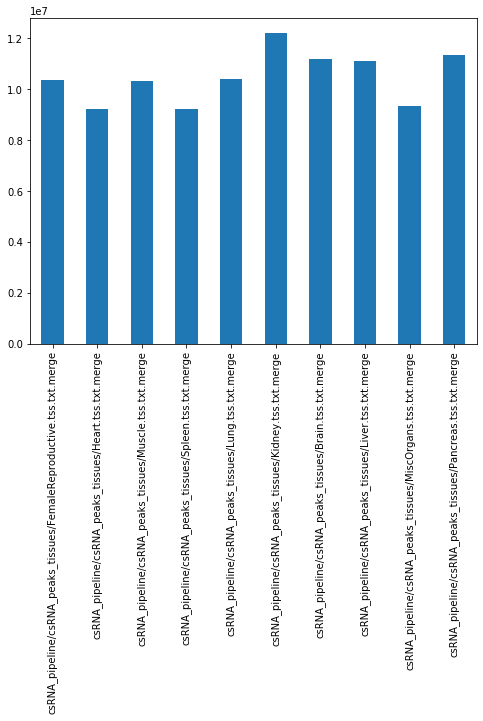

In [10]:
peaks_expression.sum().plot.bar()

In [11]:
annotation.combine_merge_with_anno(merged_file+'.minimal',anno_file=anno_f)

,Chr,Start,End,Strand,Stat,Annotation
ID,,,,,,
0,NW_020822601.1,33967773,33967923,+,40.900002,"intron (XM_027421940.1, intron 7 of 9)"
1,NW_020822455.1,6758790,6758940,+,30.000000,"intron (XM_027400224.1, intron 1 of 41)"
2,NW_020822461.1,34406811,34406961,-,36.799999,"exon (XM_027401698.1, exon 1 of 2)"
3,NW_020822687.1,15499622,15499772,-,39.599998,"intron (XM_027432645.1, intron 1 of 10)"
4,NW_020822632.1,9912312,9912462,+,36.799999,"intron (XM_027429463.1, intron 3 of 11)"
...,...,...,...,...,...,...
223555,NW_020822406.1,14607236,14607386,-,18.049999,"intron (XM_027390345.1, intron 5 of 5)"
223556,NW_020822558.1,1002132,1002282,+,10.850000,"exon (XM_027416799.1, exon 3 of 6)"
223557,NW_020822467.1,3885361,3885511,-,22.250000,Intergenic


### Distance to Genes

In [12]:
%%time

peaks_file = merged_file+'.minimal.anno'
peaks_with_dist = annotation.wrap_distance_to_landmarks(peaks_file, landmark_file=tss_file,
                          main_landmark = 'transcript_id',landmark_cols=['gene'],
                          output_f=peaks_with_distance_f,is_parallel=True,num_par=12)

CPU times: user 4.19 s, sys: 733 ms, total: 4.93 s
Wall time: 1min 23s


In [13]:
peaks_with_dist

,Chr,Start,End,Strand,Stat,Annotation,Nearest TSS,Distance to TSS,isSameStrand,Nearest gene
ID,,,,,,,,,,
0,NW_020822601.1,33967773,33967923,+,40.900002,"intron (XM_027421940.1, intron 7 of 9)",XM_027421940.1,73820.0,False,Galk2
1,NW_020822455.1,6758790,6758940,+,30.000000,"intron (XM_027400224.1, intron 1 of 41)",XM_027400224.1,109363.0,True,Ptprd
2,NW_020822461.1,34406811,34406961,-,36.799999,"exon (XM_027401698.1, exon 1 of 2)",XM_027401698.1,186.0,True,F2rl2
3,NW_020822687.1,15499622,15499772,-,39.599998,"intron (XM_027432645.1, intron 1 of 10)",XM_027432643.1,14001.0,True,Sms
4,NW_020822632.1,9912312,9912462,+,36.799999,"intron (XM_027429463.1, intron 3 of 11)",XM_027429463.1,32713.0,True,Tcf7l1
...,...,...,...,...,...,...,...,...,...,...
223555,NW_020822406.1,14607236,14607386,-,18.049999,"intron (XM_027390345.1, intron 5 of 5)",XM_027390037.1,39291.0,True,LOC103160871
223556,NW_020822558.1,1002132,1002282,+,10.850000,"exon (XM_027416799.1, exon 3 of 6)",XM_027416799.1,1777.0,True,Slc25a41
223557,NW_020822467.1,3885361,3885511,-,22.250000,Intergenic,XM_027402913.1,-31102.0,False,Enpp1


## Log expression

In [14]:
peaks_df = pd.read_csv(peaks_expression_f,sep="\t",index_col=0)
peaks_df.head()

,csRNA_pipeline/csRNA_peaks_tissues/FemaleReproductive.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Heart.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Muscle.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Spleen.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Lung.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Kidney.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Brain.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Liver.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/MiscOrgans.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Pancreas.tss.txt.merge
0,0.0,40.900002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,30.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,36.799999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,39.599998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,36.799999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
peaks_df = np.log10(peaks_df+1)
peaks_df.to_csv(peaks_expression_f + '.log10',sep="\t")

In [16]:
peaks_df

,csRNA_pipeline/csRNA_peaks_tissues/FemaleReproductive.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Heart.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Muscle.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Spleen.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Lung.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Kidney.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Brain.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Liver.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/MiscOrgans.tss.txt.merge,csRNA_pipeline/csRNA_peaks_tissues/Pancreas.tss.txt.merge
0,0.0,1.622214,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,1.491362,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,1.577492,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,1.608526,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,1.577492,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
223555,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.117271,1.397940
223556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.056905,1.089905
223557,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.117271,1.523746
223558,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.456366,1.344392


## Make peak only on single base-pair, and then remove ones that overlap with CDSs

In [17]:
peaks_df = pd.read_csv(peaks_with_distance_f,sep="\t")
peaks_df["Start"] = (1.0*(peaks_df["End"] + peaks_df["Start"])/2).astype(int)
peaks_df["End"] = peaks_df["Start"] + 1
peaks_df.to_csv(peaks_with_distance_size1_f,sep="\t")

peaks_df.head()

,ID,Chr,Start,End,Strand,Stat,Annotation,Nearest TSS,Distance to TSS,isSameStrand,Nearest gene
0,0,NW_020822601.1,33967848,33967849,+,40.900002,"intron (XM_027421940.1, intron 7 of 9)",XM_027421940.1,73820.0,False,Galk2
1,1,NW_020822455.1,6758865,6758866,+,30.000000,"intron (XM_027400224.1, intron 1 of 41)",XM_027400224.1,109363.0,True,Ptprd
2,2,NW_020822461.1,34406886,34406887,-,36.799999,"exon (XM_027401698.1, exon 1 of 2)",XM_027401698.1,186.0,True,F2rl2
3,3,NW_020822687.1,15499697,15499698,-,39.599998,"intron (XM_027432645.1, intron 1 of 10)",XM_027432643.1,14001.0,True,Sms
4,4,NW_020822632.1,9912387,9912388,+,36.799999,"intron (XM_027429463.1, intron 3 of 11)",XM_027429463.1,32713.0,True,Tcf7l1


## Using bedtools intersect
-v	Only report those entries in A that have no overlap in B. Restricted by -f and -r.  
-s  Force “strandedness”. That is, only report hits in B that overlap A on the same strand. By default, overlaps are reported without respect to strand.  


In [18]:
%%time 
peak_bed = peaks_with_distance_size1_bed_f
peaks_df[["Chr","Start","End","ID", "Stat","Strand"]].to_csv(peak_bed,header=None,sep="\t",index=False)
out_f = peaks_with_distance_size1_noCDS_bed_f

cmd = "bedtools intersect -s -v -a {peak_bed} -b {cds}  > {out_f}".format(
    peak_bed=peak_bed, cds=cds_f, out_f = out_f )
print(cmd)
!{cmd}

bedtools intersect -s -v -a csRNA_pipeline/csRNA_peaks_tissues.merged/peaks_with_tss_distances_size1.bed -b genome/picr/gcf/CDS.bed  > csRNA_pipeline/csRNA_peaks_tissues.merged/peaks_with_tss_distances_size1noCDS.bed
CPU times: user 1.21 s, sys: 27.7 ms, total: 1.24 s
Wall time: 2.83 s


In [19]:
nocds =  pd.read_csv(out_f,sep="\t",header=None)
peaks_df[peaks_df["ID"].isin(nocds[3])].to_csv(out_f.replace(".bed",".tsv"),index=False,sep="\t")